# The challenge is to recognize fraudulent credit card transactions so that the customers of credit card companies are not charged for items that they did not purchase

Main challenges involved in credit card fraud detection are:
1. Enormous Data is processed every day and the model build must be fast
enough to respond to the scam in time.
2. Imbalanced Data i.e most of the transactions (99.8%) are not fraudulent
which makes it really hard for detecting the fraudulent ones
3. Data availability as the data is mostly private.
4. Misclassified Data can be another major issue, as not every fraudulent
transaction is caught and reported.
5. Adaptive techniques used against the model by the scammers.


How to tackle these challenges?
1. The model used must be simple and fast enough to detect the anomaly
and classify it as a fraudulent transaction as quickly as possible.
2. Imbalance can be dealt with by properly using some methods which we
will talk about in the next paragraph
3. For protecting the privacy of the user the dimensionality of the data can
be reduced.
4. A more trustworthy source must be taken which double-check the data,
at least for training the model.
5. We can make the model simple and interpretable so that when the
scammer adapts to it with just some tweaks we can have a new model up
and running to deploy.

# Importing all the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

# Loading the Data

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Understanding the Data

In [4]:
df.shape

(284807, 31)

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Imbalance in the Data

# Print the amount details for Fraudulent Transactions

In [6]:
# Determine number of fraud cases in dataset
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(df[df['Class'] == 1])))
print('Valid Transactions {}'.format(len(df[df['Class'] == 0])))

0.0017304750013189597
Fraud Cases: 492
Valid Transactions 284315


Only 0.17% fradulent transaction out all the transactions. The data is highly unbalanced.
Lets first apply our models without balancing it and if we dont get a good accuracy then we can find a way to balance this dataset.

# Print the amount details for Valid Transactions

In [9]:
print('Details of the valid transaction:')
valid.Amount.describe()

Details of the valid transaction:


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

As we can clearly notice from this, the average money transaction for the fraudulent ones is more. This makes the problem crucial to deal with.

# Plotting the correlation matrix

The correlation matrix graphically gives us an idea of how features correlate with each other and can help us predict what are the features that are most relevant for the prediction

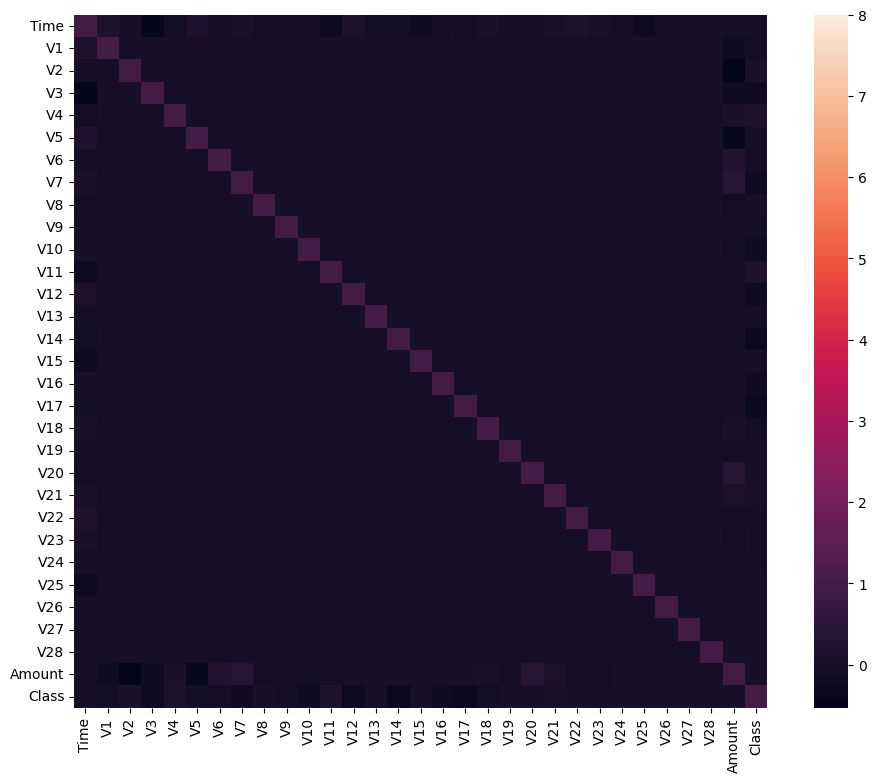

In [10]:
# correlation matrix
cor = df.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(cor, vmax = 8, square = True)
plt.show()

In the HeatMap we can clearly see that most of the features do not correlate to other features but there are some features that either has a positive or a negative correlation with each other. For eg: V2 and V5 are highly negatively correlated with the feature called Amount. We also see some correlation with V20 and amount. This gives us a deeper understanding of the Data available to us.

# Seperating the X and Y values

Dividing the Data into input parameters and outputs value format

In [11]:
# dividing the X and Y from the dataset
X = df.drop(['Class'], axis = 1)
Y = df['Class']
print(X.shape)
print(Y.shape)

# getting just the values for sake of processing (it is numpy array with no columns)
xData = X.values
yData = Y.values

(284807, 30)
(284807,)


# Training and Testing data Bifurcation

The dataset will be divided into two main groups. One for training the model and the other for Testing our trained model's performance.

In [12]:
# Using scikit learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size = 0.2, random_state = 42)

### Building a Random Forest model using scikit learn

In [13]:
# Building a Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
yPred = rfc.predict(xTest)

### Building all kinds of evaluating parameters

In [14]:
# Evaluating the classifier, printing every score of the classifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print('The model used is Random Forest Classifier')

acc = accuracy_score(yTest, yPred)
print('The accuracy is {}'.format(acc))

prec = precision_score(yTest, yPred)
print('The precision is {}'.format(prec))

rec = recall_score(yTest, yPred)
print('The recall is {}'.format(rec))

f1 = f1_score(yTest, yPred)
print('The F1-score is {}'.format(f1))

mcc = matthews_corrcoef(yTest, yPred)
print('The matthews correlation coefficient is {}'.format(mcc))

The model used is Random Forest Classifier
The accuracy is 0.9995611109160493
The precision is 0.974025974025974
The recall is 0.7653061224489796
The F1-score is 0.8571428571428571
The matthews correlation coefficient is 0.8631826952924256


# Visualizing the confusion matrix

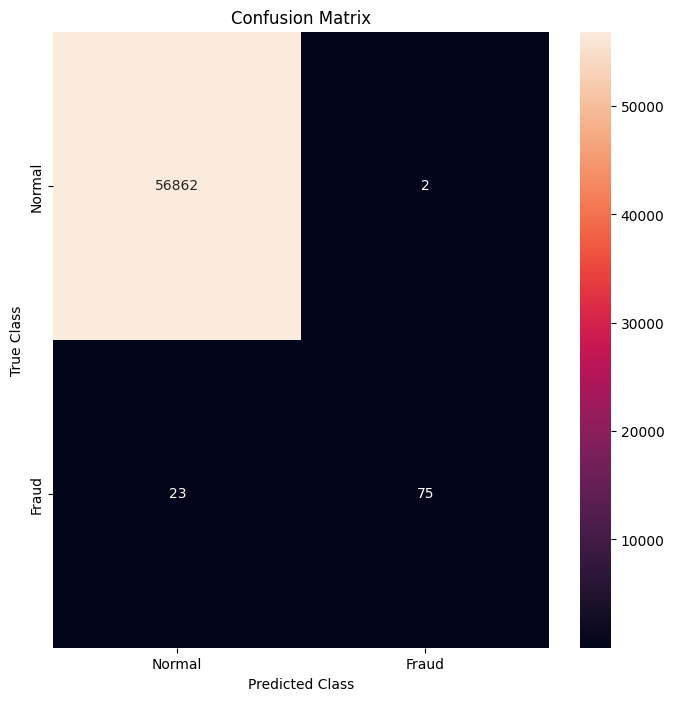

In [16]:
# printing the confusion matrix
labels = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize=(8,8))
sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, fmt = 'd')
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()